<a href="https://colab.research.google.com/github/ALItaheri1380/ImageProcessing/blob/main/Copy_of_ali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from tensorflow import keras
from keras.constraints import maxnorm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(x_train , y_train) , (x_test , y_test) = cifar10.load_data()

In [ ]:
#normalize 
x_train = x_train.astype('float64')

x_train /= 255 

x_test = x_test.astype('float64')

x_test /= 255

# onehot encoding

y_train = np_utils.to_categorical(y_train)

y_test = np_utils.to_categorical(y_test)

In [ ]:
sample = y_test.shape[1]

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), (1 , 1), input_shape=(32 , 32 , 3), activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), (1 , 1), activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), (1 , 1), activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), (1 , 1), activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(sample, activation = 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
myHis = model.fit(x_train , y_train , validation_data = (x_test , y_test) ,  epochs=32, batch_size=85)

Epoch 1/32
589/589 [==============================] - 22s 13ms/step - loss: 1.6243 - accuracy: 0.4129 - val_loss: 1.7525 - val_accuracy: 0.3690
Epoch 2/32
589/589 [==============================] - 7s 11ms/step - loss: 1.2090 - accuracy: 0.5683 - val_loss: 1.0145 - val_accuracy: 0.6371
Epoch 3/32
589/589 [==============================] - 7s 11ms/step - loss: 1.0261 - accuracy: 0.6384 - val_loss: 0.9132 - val_accuracy: 0.6768
Epoch 4/32
589/589 [==============================] - 7s 11ms/step - loss: 0.9239 - accuracy: 0.6764 - val_loss: 0.8925 - val_accuracy: 0.6866
Epoch 5/32
589/589 [==============================] - 7s 12ms/step - loss: 0.8493 - accuracy: 0.7071 - val_loss: 0.8464 - val_accuracy: 0.7046
Epoch 6/32
589/589 [==============================] - 7s 12ms/step - loss: 0.8048 - accuracy: 0.7232 - val_loss: 1.0461 - val_accuracy: 0.6457
Epoch 7/32
589/589 [==============================] - 7s 12ms/step - loss: 0.7667 - accuracy: 0.7337 - val_loss: 0.6876 - val_accuracy: 0.758

In [ ]:
#you must find max index and check
model.predict(x_test[:10])[4]

array([1.5621147e-08, 7.8600550e-08, 2.9346361e-04, 3.0515195e-05,
       6.8713496e-03, 1.1565981e-05, 9.9279308e-01, 1.2598980e-08,
       4.2164150e-08, 7.1407871e-09], dtype=float32)

In [ ]:
y_test[4]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

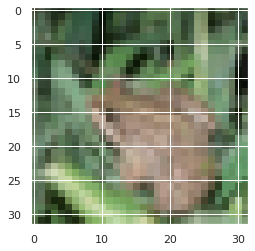

In [ ]:
plt.imshow(x_test[4])